In [1]:
# %load main.py
import sys
# import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

from armax import armax
from config import config
import mysql_utils as mysql
import visualization

In [2]:
DATA_FREQUENCY = dt.timedelta(minutes=5)

In [314]:
flow = pd.read_csv("flow_original.csv", index_col=0)
time = pd.to_datetime(flow.index.values).to_pydatetime()
flow = pd.DataFrame(flow, index=time)

In [315]:
time = min(time) + np.arange((max(time) - min(time)) / DATA_FREQUENCY + 1)*DATA_FREQUENCY
flow_original = flow.reindex(time, fill_value=np.nan)
flow = flow_original.interpolate(method='linear')

In [316]:
sd = seasonal_decompose(flow, freq=12*24*7)

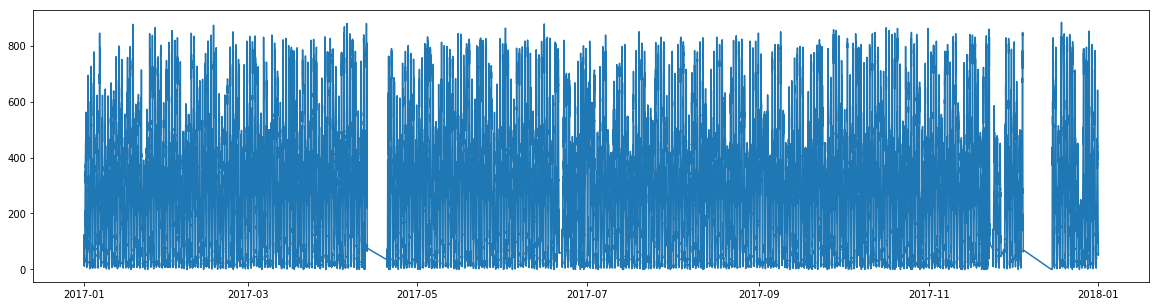

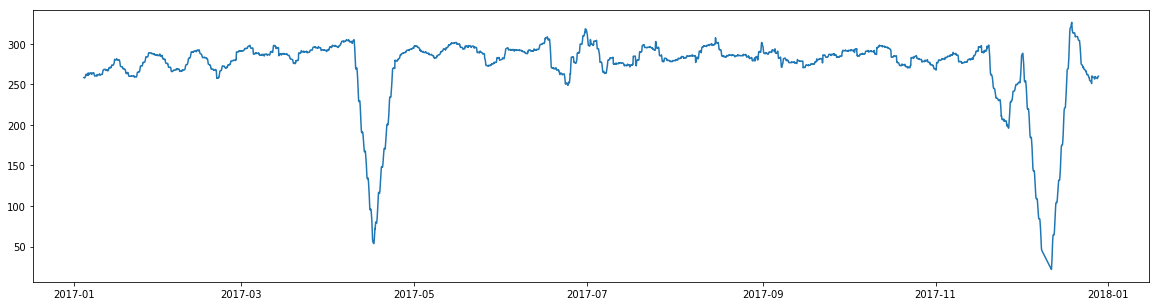

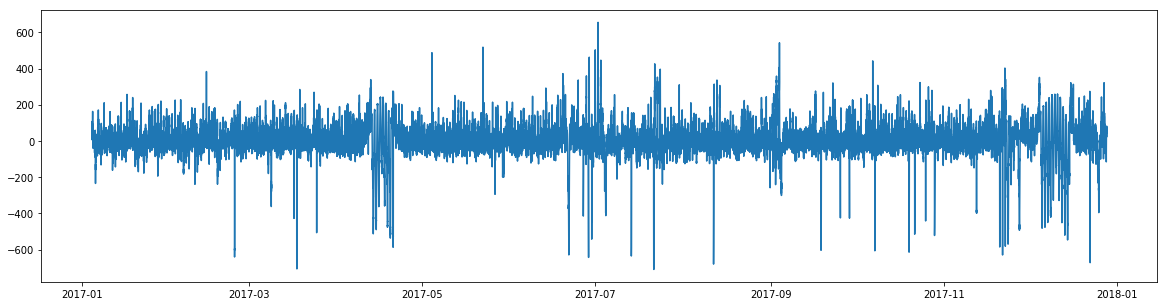

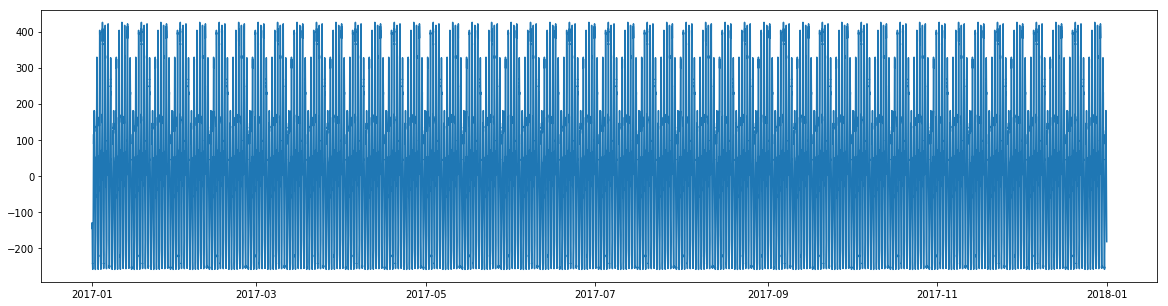

In [317]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.observed)
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.trend)
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.resid)
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.seasonal)
plt.show()

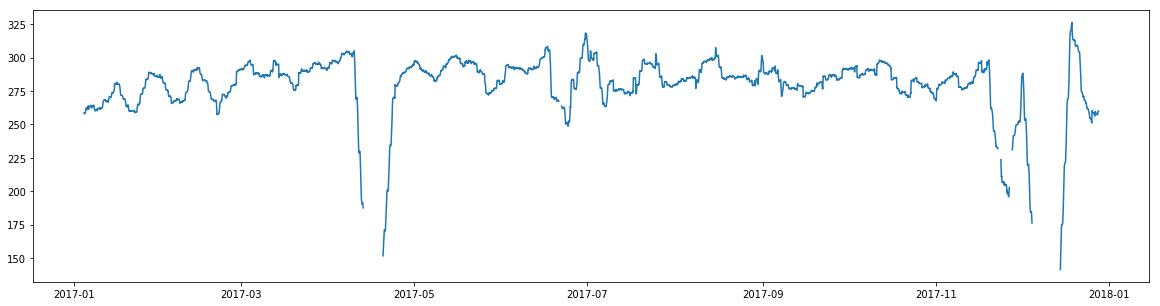

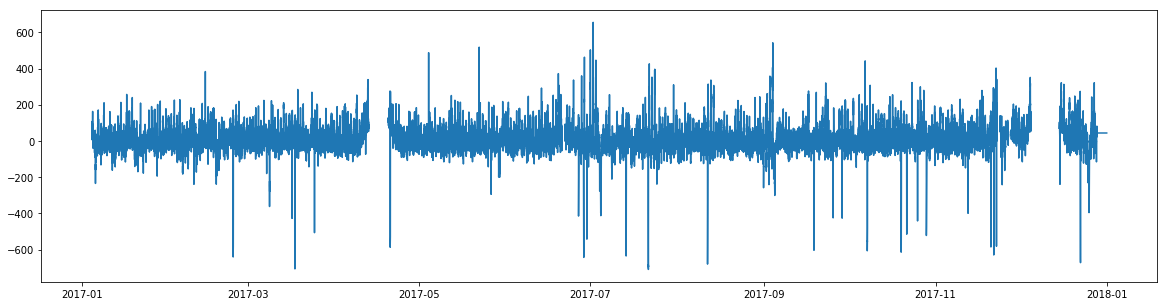

In [320]:
sd.trend[flow_original.isnull()] = np.nan
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.trend)
sd.trend = sd.trend.interpolate()
sd.resid[flow_original.isnull()] = np.nan
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.resid)
sd.resid = sd.resid.interpolate()
plt.show()

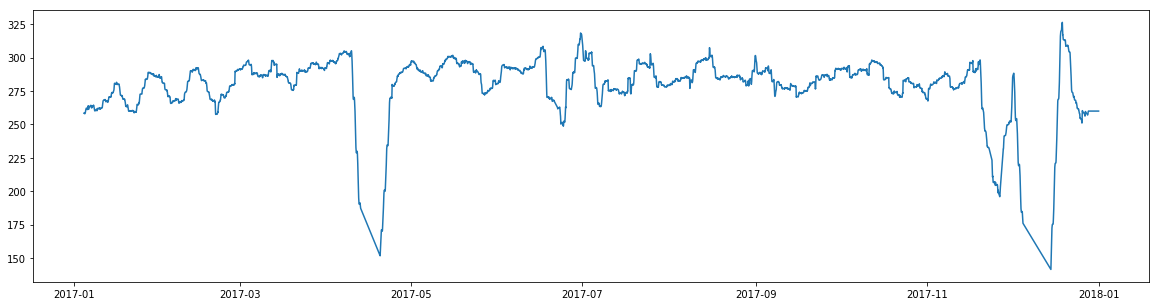

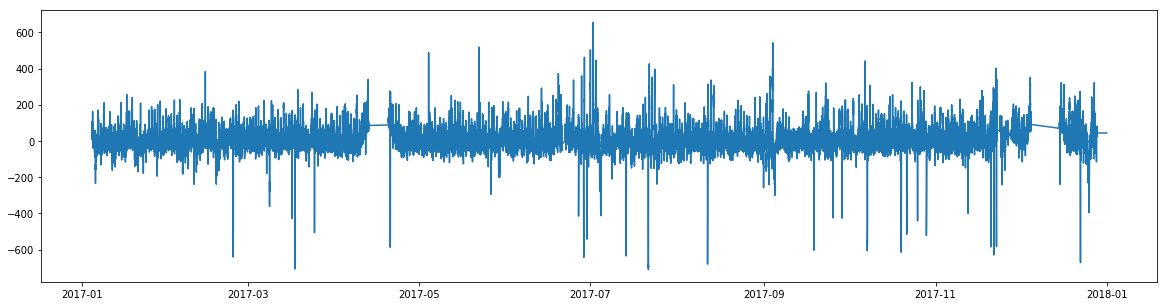

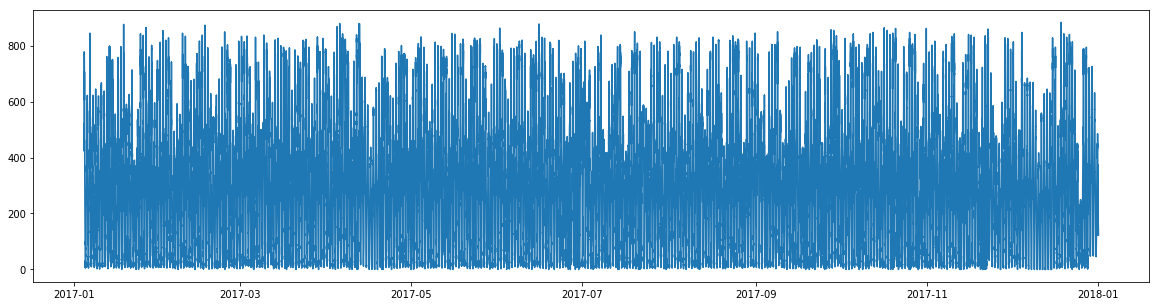

In [321]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.trend)
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(sd.resid)
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot((sd.resid + sd.trend + sd.seasonal).clip(lower=0))
plt.show()

In [8]:
armax_model = armax(flow, dates=time, frequency=DATA_FREQUENCY)

In [9]:
armax_model.fit_to_order((1, 1), method="css", cross_validate=True, verbose=True)

Fitting order (1, 1)
Cross validating monthly results in 11 folds
Trained month 0; sse 49489.436595637315
Trained month 1; sse 54007.35171869743
Trained month 2; sse 52302.80258023248
Trained month 3; sse 52104.40911284782
Trained month 4; sse 52749.22596109
Trained month 5; sse 46715.931396382206
Trained month 6; sse 50025.471576066164
Trained month 7; sse 51235.10931890155
Trained month 8; sse 54103.32497355843
Trained month 9; sse 55231.448307788916
Trained month 10; sse 55604.583638555174


In [9]:
armax_model.fit(method="css", cross_validate=True, verbose=True)

Fitting order (1, 1)
Cross validating monthly results in 11 folds
Trained month 0; sse 49489.436595637315
Trained month 1; sse 54007.35171869743
Trained month 2; sse 52302.80258023248
Trained month 3; sse 52104.40911284782
Trained month 4; sse 52749.22596109
Trained month 5; sse 46715.931396382206
Trained month 6; sse 50025.471576066164
Trained month 7; sse 51235.10931890155
Trained month 8; sse 54103.32497355843
Trained month 9; sse 55231.448307788916
Trained month 10; sse 55604.583638555174
Finished cross validation with order (1, 1); average sse 47797.42459831312
Order (1, 1) sse: 47797.42459831312
Fitting order (1, 2)
Cross validating monthly results in 11 folds
Trained month 0; sse 49234.71614497848
Trained month 1; sse 53737.293694985034
Trained month 2; sse 52234.77295486261
Trained month 3; sse 51923.15201053454
Trained month 4; sse 52507.10488113268
Trained month 5; sse 46707.66352231586
Trained month 6; sse 49820.85236819776
Trained month 7; sse 51223.66970430013
Trained mont

/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/Users/victorchan/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


Trained month 3; sse 51972.06712115702
Trained month 4; sse 52188.609210006885
Trained month 5; sse 46751.16789013532
Trained month 6; sse 49590.1002377351
Trained month 7; sse 51205.587864467096
Trained month 8; sse 53716.8165929246
Trained month 9; sse 54733.11718550012
Trained month 10; sse 54314.6544224835
Finished cross validation with order (2, 2); average sse 47492.481788042096
Order (2, 2) sse: 47492.481788042096
Fitting order (2, 3)
Cross validating monthly results in 11 folds
Trained month 0; sse 49313.3307003986
Trained month 1; sse 53837.42744546606
Trained month 2; sse 52257.3298386536
Trained month 3; sse 51733.54546239658
Trained month 4; sse 52174.70980593044
Trained month 5; sse 46757.55129149418
Trained month 6; sse 49581.70431166346
Trained month 7; sse 51206.90135439332
Trained month 8; sse 53705.38148040565
Trained month 9; sse 54718.643546501844
Trained month 10; sse 54265.64733364604
Finished cross validation with order (2, 3); average sse 47462.68104757915
Order

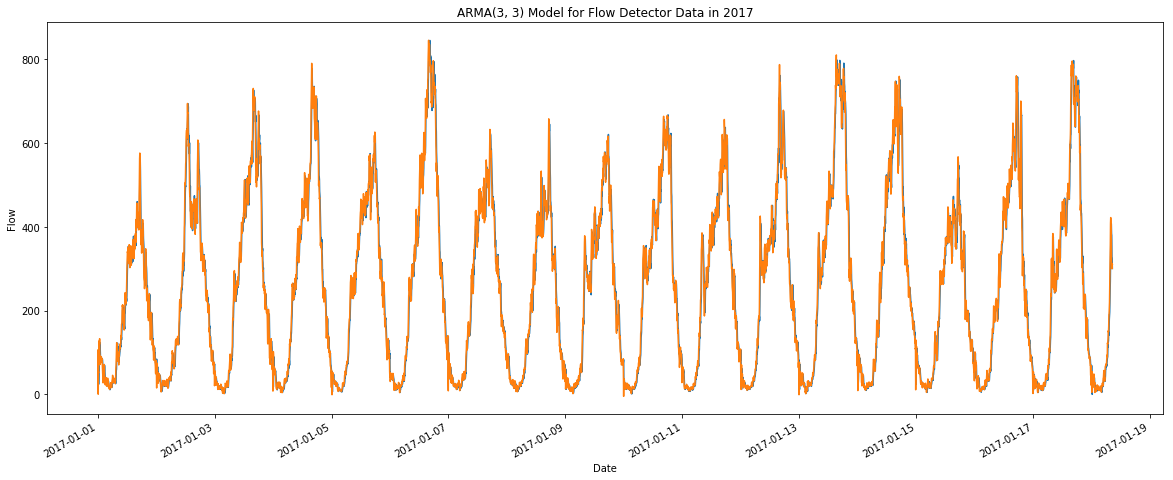

In [46]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("ARMA(3, 3) Model for Flow Detector Data in 2017")
fig.autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Flow")

plt.plot(time[:5000], flow.values[:5000])
plt.plot(time[:5000], armax_model._armax_models[armax_model.get_best_model_order()].fittedvalues.values[:5000])
plt.show()

In [ ]:
for order in armax_model._armax_models:
    m = armax_model._armax_models[order]
    print(order)
    print(m.aic)
    print(m.bic)
    print(np.sum(np.power(m.resid, 2)))

In [ ]:
print(armax_model.best_model_order)

In [ ]:
a = armax_model._armax_models[(3, 3)]

In [ ]:
b = armax_model._armax_models[(1, 1)]

In [ ]:
index0 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 9)))
index1 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 10)))
index2 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 11)))
index3 = min(range(len(time)), key=lambda i: (1 - (time[i].month == 12)))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index0:index1], flow[index0:index1])
plt.plot(time[index0:index1], a.fittedvalues[index0:index1])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
fig.autofmt_xdate()
plt.plot(time[index1:index2], flow[index1:index2])
plt.plot(time[index1:index2], a.fittedvalues[index1:index2])
plt.show()

In [109]:
# time, flow, occupancy = query_detector_data(cursor, DETECTOR_DATA_TABLE, DETECTOR_ID, graph=False)

In [ ]:
cursor.close()
cnx.close()

In [18]:
def query_detector_data(cursor, table, detector_id, graph=False):
    query = DETECTOR_DATA_QUERY.format(table, detector_id)

    cursor = mysql.query(cursor, query)
    
    if cursor == None:
        return

    time = []
    volume = []
    occupancy = []
    #speed = []

    for row in cursor:
        d = dt.datetime(row[1], row[2], row[3], row[4] // 3600, (row[4] % 3600) // 60, row[4] % 60)
        time.append(d)

        volume.append(row[5])
        occupancy.append(row[6])
        #speed.append(row[7])

    time = np.array(time)
    volume = np.array(volume)
    occupancy = np.array(occupancy)
    occupancy_percentage = occupancy / 3600 * 100
    #speed = np.array(speed)

    if graph:
        visualization.plot_data_over_time(time, volume, title="Detector {} Volume 2017".format(detector_id), ylabel="Volume (vph)", figsize=(12, 5))
        visualization.plot_data_over_time(time, occupancy, title="Detector {} Occupancy 2017".format(detector_id), ylabel="Occupancy (s)", figsize=(12, 5))
        #visualization.plot_data_over_time(time, speed, title="Detector {} Speed 2017".format(detector_id), ylabel="Speed", figsize=(12, 5))
        visualization.plot_data_over_time(time, occupancy_percentage, title="Detector {} Occupancy 2017".format(detector_id), ylabel="Occupancy (%)", figsize=(12, 5))
        visualization.plot_fundamental_diagram(volume, occupancy_percentage, title="Detector {} Flow-Occupancy Diagram 2017".format(detector_id))

    return time, volume, occupancy